# Module Title:	 Strategic Thinking - Semester II
### Assessment Title: Capstone Project Semester II
### Lecturer Name:	 James Garza
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112

This academic project aims to delivery a critical analysis of the knowledge produced, in the course: Higher Diploma in Science in Data Analytics for Business at CCT College.

In [1]:
# pip install dtreeviz

In [2]:
# pip install yellowbrick

In [3]:
# conda install -c conda-forge imbalanced-learn

In [4]:
# pip install shap

In [338]:
# Importing required libraries.
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import asarray
import statistics as stats
import scipy.stats
from scipy.stats import skew
from scipy.stats import f_oneway
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV

from sklearn.datasets import make_classification
import shap
from collections import Counter
import dtreeviz
from yellowbrick.model_selection import FeatureImportances

#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import 
#from sklearn.model_selection import 

import warnings
warnings.filterwarnings('ignore')

# Data Dictionary:

Administrative: This is the number of administrative pages visited by the shoppers.

Administrative_Duration: This is the amount of time (in seconds) spent in this category of pages.

Informational: This is the number of informational pages visited by the shoppers.

Informational_Duration: This is the amount of time (in seconds) spent in this category of pages.

ProductRelated: This is the number of Product related pages visited by the shoppers.

ProductRelated_Duration: This is the amount of time (in seconds) spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase

# 3. Data Understanding

## 3.1 Exploratory Data Analysis (EDA)

In [339]:
# loading the data into dataframe.
df = pd.read_csv('../../data/online_shoppers_intention.csv')

In [340]:
df.shape
print('The dataset original shape: ', df.shape)

The dataset original shape:  (12330, 18)


In [341]:
df.isnull().values.any()

False

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [343]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [344]:
df.describe(include=object)

Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551

In [345]:
stat=df.describe()
stat.T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

In [346]:
# Target variable Imbalancing
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

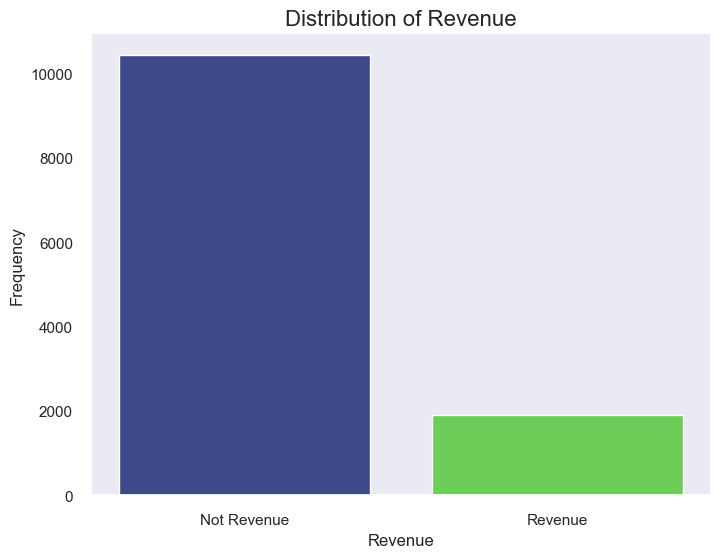

In [347]:
# Plot target variable
target = df.groupby('Revenue').size()

plt.figure(figsize=(8, 6)) 
plt.bar(target.index, target.values, color=['#3E4989', '#6DCD59'])  
plt.title('Distribution of Revenue', fontsize=16)  

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(target.index, ['Not Revenue', 'Revenue'], rotation=0)  
plt.grid(False)  

plt.show()

In [348]:
first_df = df.rename(columns={"Administrative": "adm", "Administrative_Duration": "adm_dur",
                        "Informational":"inf","Informational_Duration":"inf_dur","ProductRelated":"prod_rel",
                        "ProductRelated_Duration":"prod_rel_dur","BounceRates":"bounces","ExitRates":"exit",
                        "PageValues":"pg_val","SpecialDay":"s_day","Month":"month","OperatingSystems":"os",
                        "Browser":"browser","Region":"reg","TrafficType":"traffic","VisitorType":"visitor",
                        "Weekend":"kend","Revenue":"rev"})

In [349]:
first_df.head()

adm  adm_dur  inf  inf_dur  prod_rel  prod_rel_dur  bounces  exit  pg_val  \
0    0      0.0    0      0.0         1      0.000000     0.20  0.20     0.0   
1    0      0.0    0      0.0         2     64.000000     0.00  0.10     0.0   
2    0      0.0    0      0.0         1      0.000000     0.20  0.20     0.0   
3    0      0.0    0      0.0         2      2.666667     0.05  0.14     0.0   
4    0      0.0    0      0.0        10    627.500000     0.02  0.05     0.0   

   s_day month  os  browser  reg  traffic            visitor   kend    rev  
0    0.0   Feb   1        1    1        1  Returning_Visitor  False  False  
1    0.0   Feb   2        2    1        2  Returning_Visitor  False  False  
2    0.0   Feb   4        1    9        3  Returning_Visitor  False  False  
3    0.0   Feb   3        2    2        4  Returning_Visitor  False  False  
4    0.0   Feb   3        3    1        4  Returning_Visitor   True  False

In [350]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adm           12330 non-null  int64  
 1   adm_dur       12330 non-null  float64
 2   inf           12330 non-null  int64  
 3   inf_dur       12330 non-null  float64
 4   prod_rel      12330 non-null  int64  
 5   prod_rel_dur  12330 non-null  float64
 6   bounces       12330 non-null  float64
 7   exit          12330 non-null  float64
 8   pg_val        12330 non-null  float64
 9   s_day         12330 non-null  float64
 10  month         12330 non-null  object 
 11  os            12330 non-null  int64  
 12  browser       12330 non-null  int64  
 13  reg           12330 non-null  int64  
 14  traffic       12330 non-null  int64  
 15  visitor       12330 non-null  object 
 16  kend          12330 non-null  bool   
 17  rev           12330 non-null  bool   
dtypes: bool(2), float64(7), in

## 3.2 Data Visualization

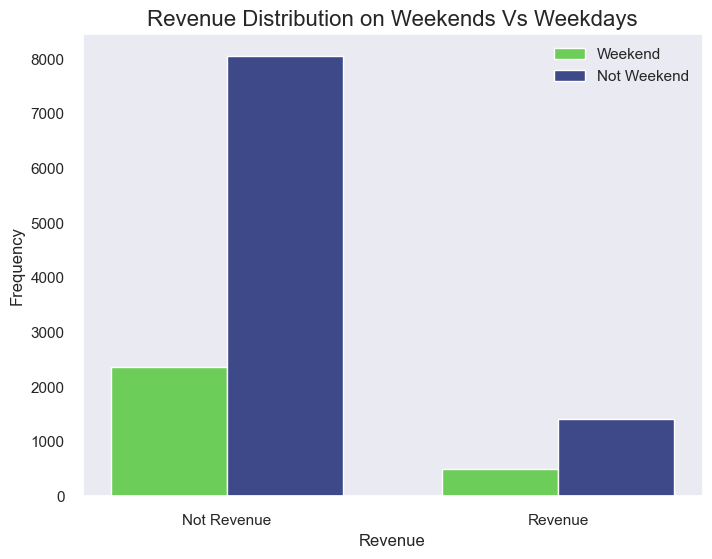

In [351]:
# Plot Revenue Distribution on Weekends Vs Weekdays
grouped_data = df.groupby(['Revenue','Weekend']).size().unstack()

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(grouped_data.index))

plt.bar(index, grouped_data[True], bar_width, label='Weekend', color='#6DCD59')
plt.bar(index + bar_width, grouped_data[False], bar_width, label='Not Weekend', color='#3E4989')

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution on Weekends Vs Weekdays', fontsize=16)
plt.xticks(index + bar_width / 2, ['Not Revenue', 'Revenue'])

plt.grid(False)
plt.legend()
plt.show()

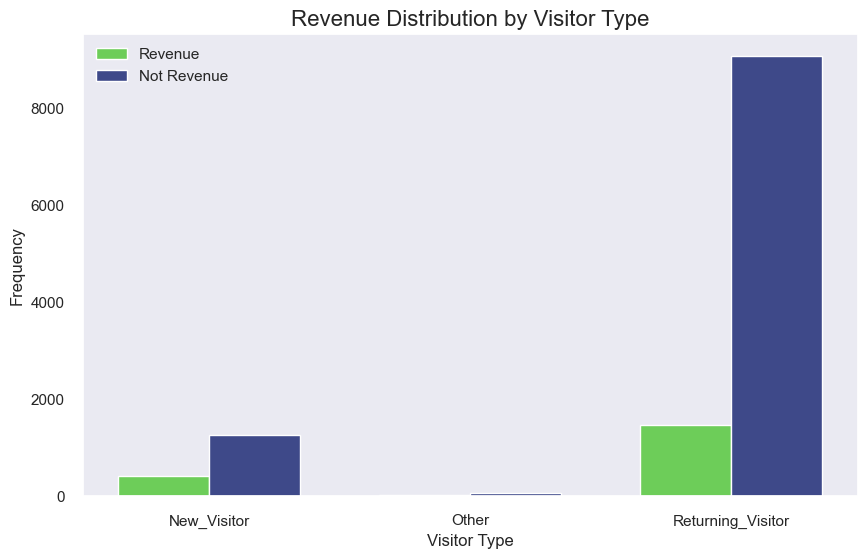

In [352]:
# Plot Revenue Distribution by Visitor Type
visitor_grouped_data = df.groupby(['VisitorType', 'Revenue']).size().unstack()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(visitor_grouped_data.index))

plt.bar(index, visitor_grouped_data[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, visitor_grouped_data[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by Visitor Type', fontsize=16)
plt.xticks(index + bar_width / 2, visitor_grouped_data.index)

plt.grid(False)
plt.legend()
plt.show()

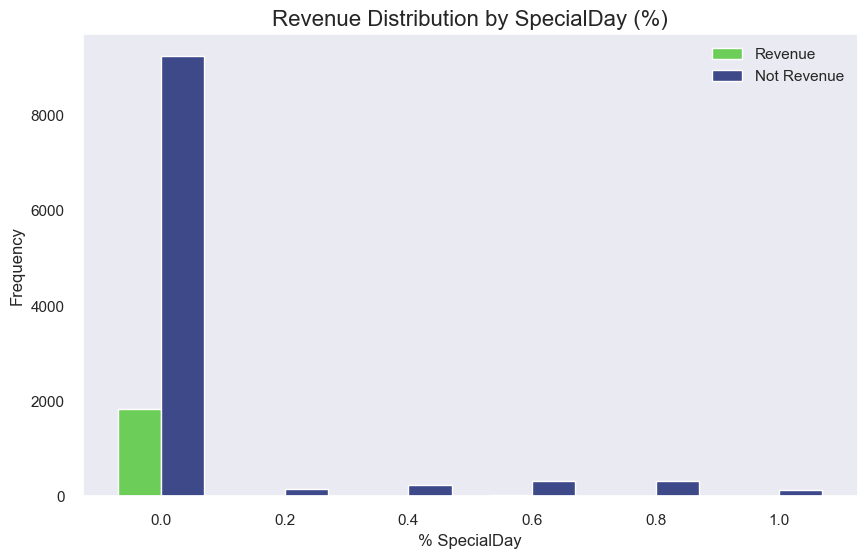

In [353]:
# Plot Revenue Distribution by Visitor Type
visitor_grouped_data = df.groupby(['SpecialDay', 'Revenue']).size().unstack()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(visitor_grouped_data.index))

plt.bar(index, visitor_grouped_data[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, visitor_grouped_data[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('% SpecialDay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by SpecialDay (%)', fontsize=16)
plt.xticks(index + bar_width / 2, visitor_grouped_data.index)

plt.grid(False)
plt.legend()
plt.show()

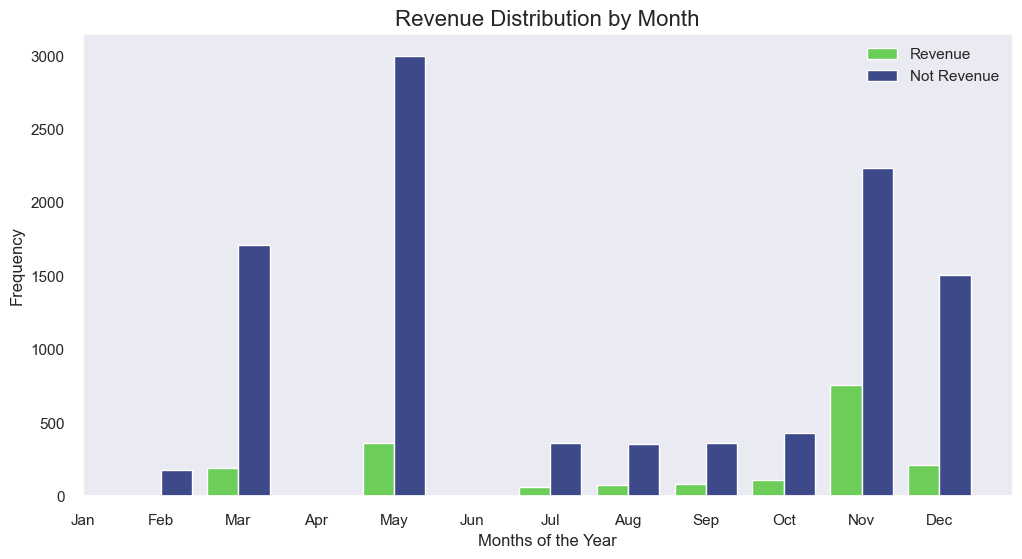

In [354]:
# Order bars per months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot Revenue Distribution by Month
revenue_by_month = df.groupby(['Month', 'Revenue']).size().unstack().reindex(month_order)
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(revenue_by_month.index))

plt.bar(index, revenue_by_month[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, revenue_by_month[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by Month', fontsize=16)
plt.xticks(index + bar_width / 2, revenue_by_month.index)

plt.grid(False)
plt.legend()
plt.show()

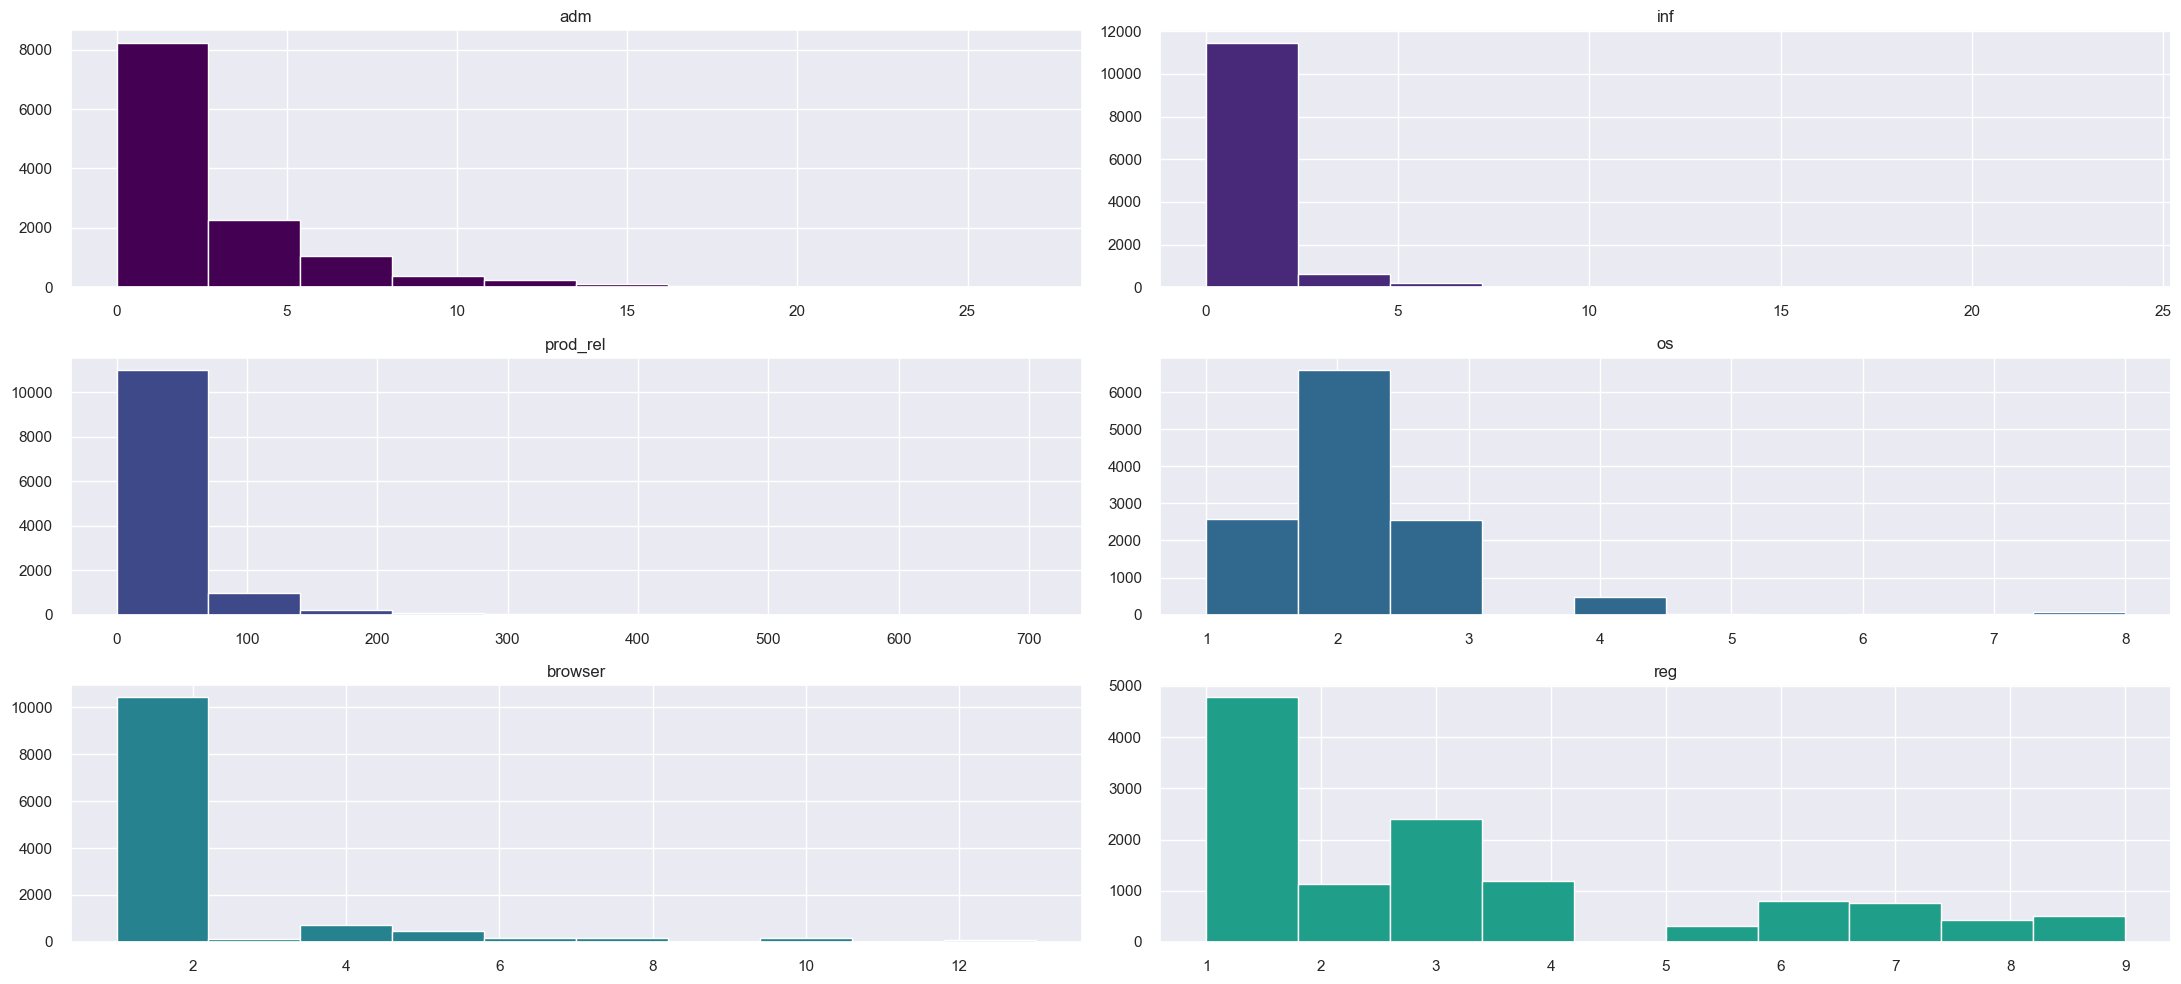

In [355]:
custom_colors = ['#440154', '#482878', '#3E4989', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']

# Plot the distribution of numerical attributes 
ax = first_df.hist(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg'], figsize=(22, 10), grid=True)

for a, color in zip(ax.flatten(), custom_colors):
    for patch in a.patches:
        patch.set_facecolor(color)  

plt.tight_layout()
plt.show()

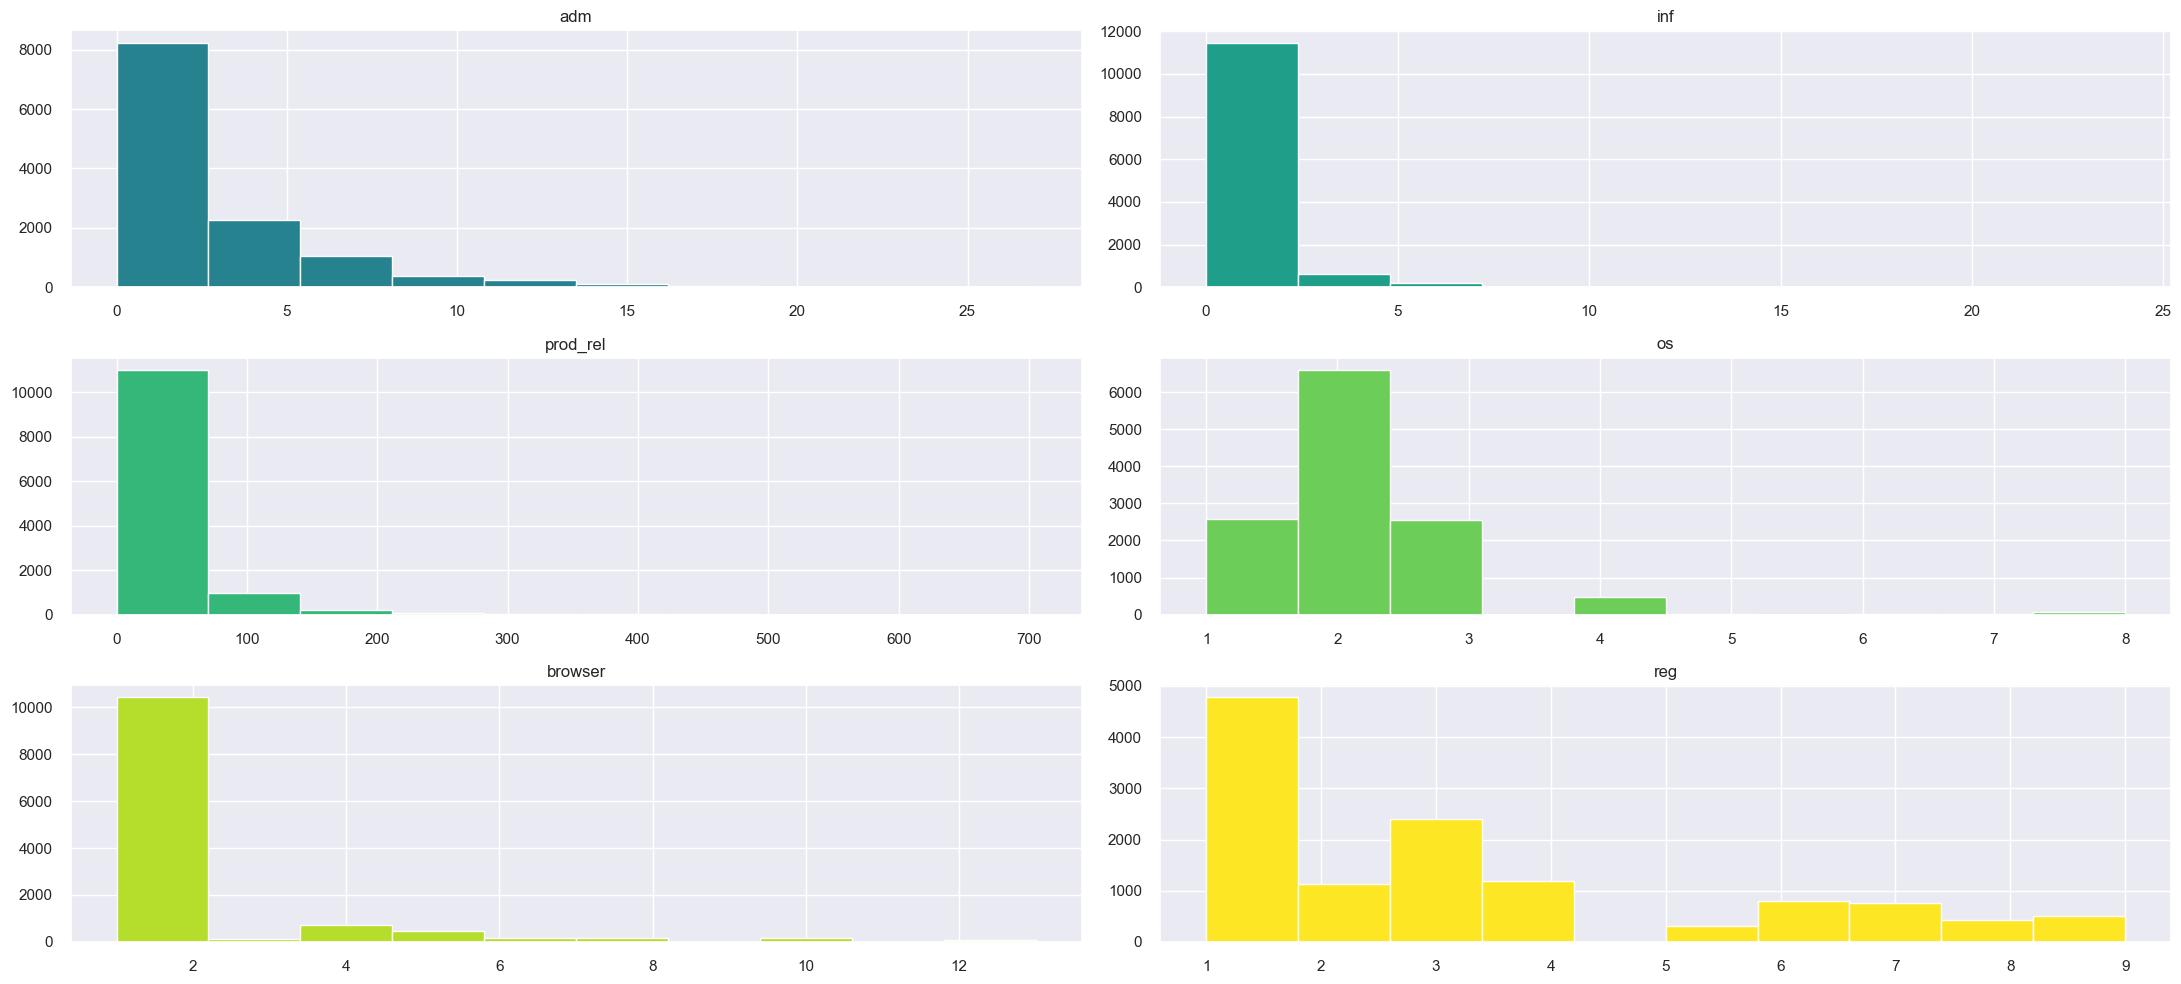

In [356]:
custom_colors = ['#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']

# Plot the distribution of numerical attributes
ax = first_df.hist(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg'], figsize=(22, 10), grid=True)

# Accessing individual axes to set colors
for a, color in zip(ax.flatten(), custom_colors):
    for patch in a.patches:
        patch.set_facecolor(color)  

plt.tight_layout()
plt.show()

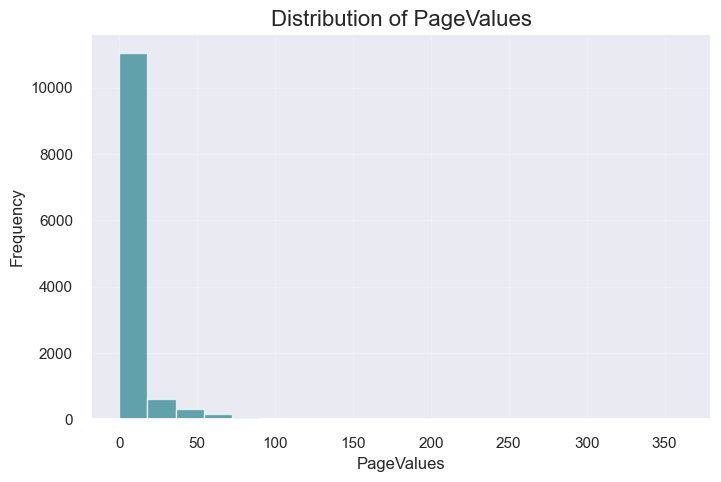

In [357]:
# Plot the distribution of 'PageValues' column
plt.figure(figsize=(8, 5))
plt.hist(first_df['pg_val'], bins=20, alpha=0.7, color='#26828E')
plt.title('Distribution of PageValues', fontsize=16)
plt.xlabel('PageValues', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.2)

plt.show()

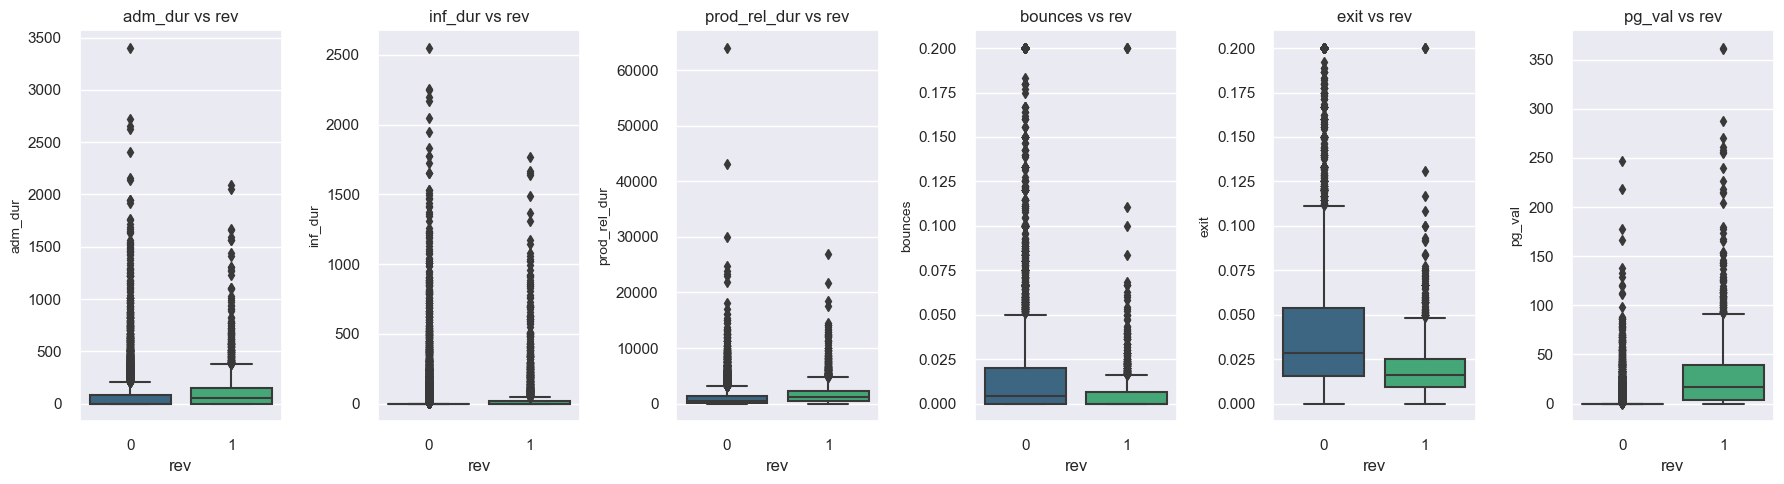

In [375]:
continuousColsList = ['adm_dur', 'inf_dur', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']
viridis_palette = sns.color_palette("viridis", 2)  

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(continuousColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "Revenue"
for PredictorCol, i in zip(continuousColsList, range(len(continuousColsList))):
    sns.boxplot(x='rev', y=PredictorCol, data=first_df, ax=PlotCanvas[i], palette=viridis_palette)
    PlotCanvas[i].set_title(f'{PredictorCol} vs rev', fontsize=12)
    PlotCanvas[i].set_ylabel(PredictorCol, fontsize=10)

plt.tight_layout()
plt.show()

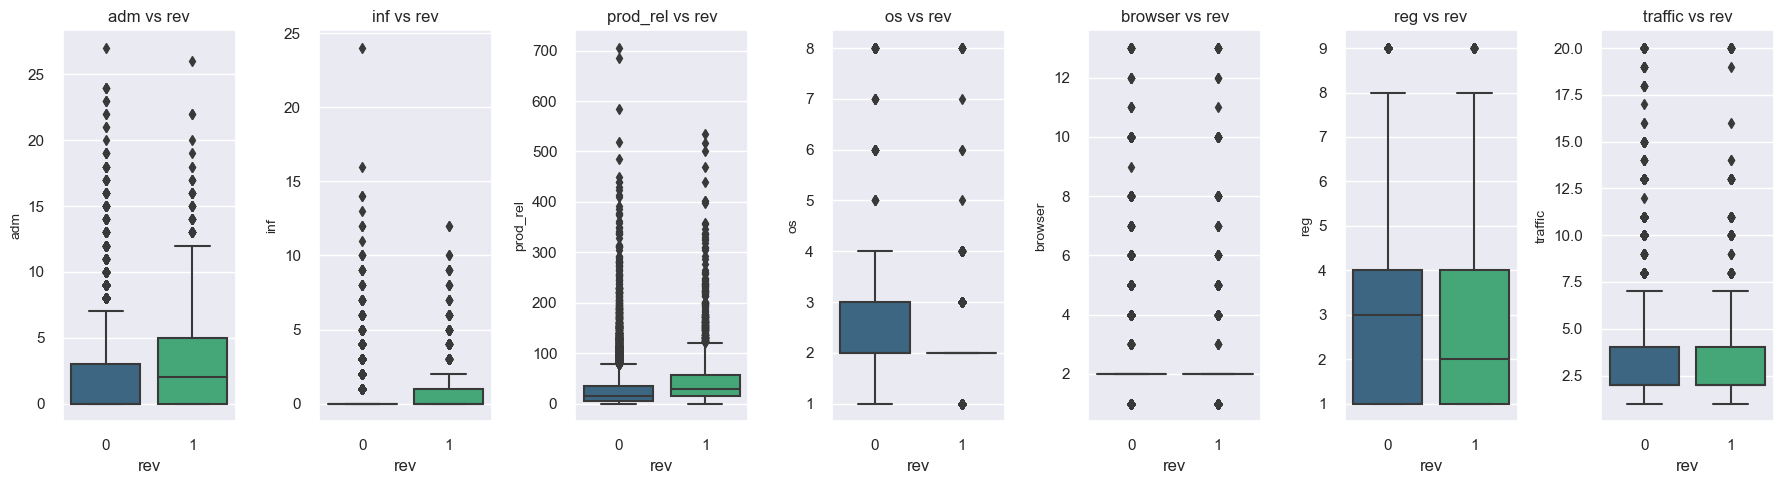

In [376]:
continuousColsList = ['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg', 'traffic']
viridis_palette = sns.color_palette("viridis", 2)  

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(continuousColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "Revenue"
for PredictorCol, i in zip(continuousColsList, range(len(continuousColsList))):
    sns.boxplot(x='rev', y=PredictorCol, data=first_df, ax=PlotCanvas[i], palette=viridis_palette)
    PlotCanvas[i].set_title(f'{PredictorCol} vs rev', fontsize=12)
    PlotCanvas[i].set_ylabel(PredictorCol, fontsize=10)

plt.tight_layout()
plt.show()

In [360]:
# Checking unique values by attribute non numerical
first_df['rev'].unique(), first_df["kend"].unique(), first_df["visitor"].unique(), first_df["month"].unique(),

(array([False,  True]),
 array([False,  True]),
 array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object),
 array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object))

In [361]:
# Tranforming boolean into integer
first_df['rev'] = first_df['rev'].astype(int)
first_df['kend'] = first_df['kend'].astype(int)

In [362]:
first_df['month'].replace('Feb', 2, inplace = True)
first_df['month'].replace('Mar', 3, inplace = True)
first_df['month'].replace('May', 5, inplace = True)
first_df['month'].replace('Oct', 10, inplace = True)
first_df['month'].replace('June', 6, inplace = True)
first_df['month'].replace('Jul', 7, inplace = True)
first_df['month'].replace('Aug', 8, inplace = True)
first_df['month'].replace('Nov', 11, inplace = True)
first_df['month'].replace('Sep', 9, inplace = True)
first_df['month'].replace('Dec', 12, inplace = True)

In [363]:
first_df['visitor'].replace('Returning_Visitor', 0, inplace = True)
first_df['visitor'].replace('New_Visitor', 1, inplace = True)
first_df['visitor'].replace('Other', 2, inplace = True)

In [364]:
# Calculate IQR per attribute
Q1 = first_df.quantile(0.25)
Q3 = first_df.quantile(0.75)
IQR = Q3-Q1
#IQR.sort_values(ascending=False)

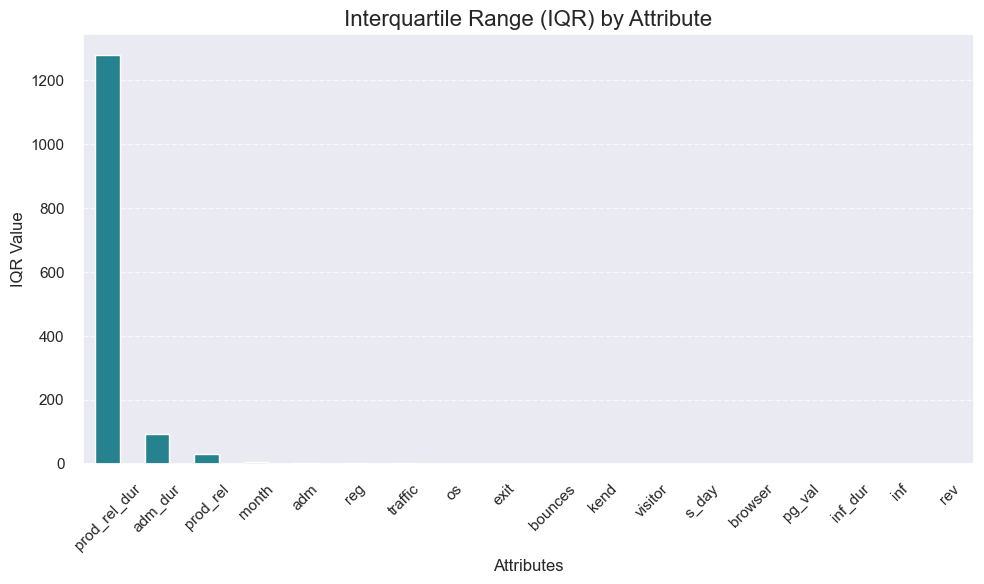

In [365]:
# Plot the IQR values#
plt.figure(figsize=(10, 6))  
IQR.sort_values(ascending=False).plot(kind="bar", color='#26828E') 

plt.title("Interquartile Range (IQR) by Attribute", fontsize=16)  
plt.xlabel("Attributes", fontsize=12)  
plt.ylabel("IQR Value", fontsize=12)  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.grid(axis='x', linestyle=' ')

plt.tight_layout()
plt.show()

In [366]:
skew_df = first_df.skew()
#skew_df.sort_values(ascending=False)

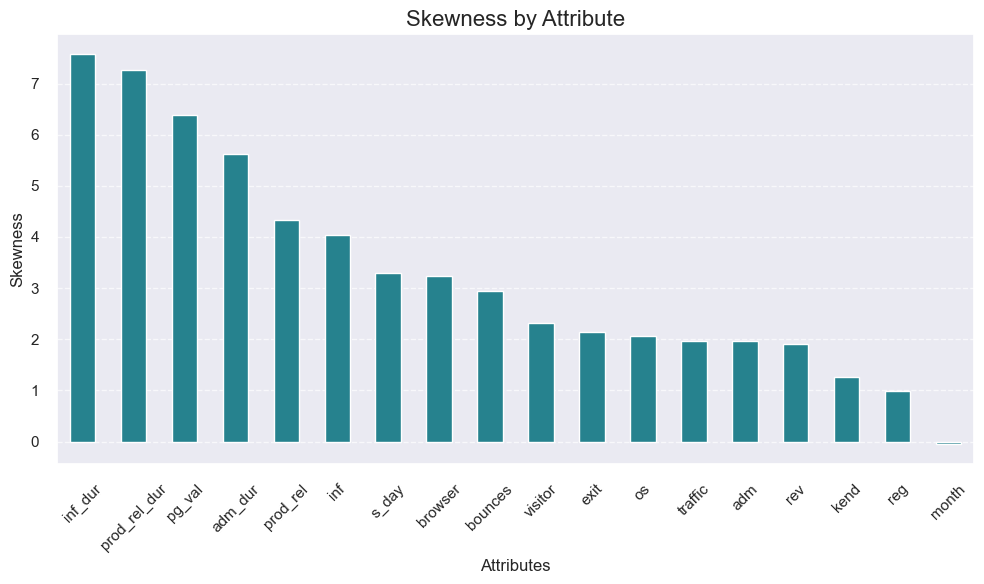

In [367]:
# Plot the skewness values
plt.figure(figsize=(10, 6)) 
skew_df.sort_values(ascending=False).plot(kind="bar", color='#26828E')  

plt.title("Skewness by Attribute", fontsize=16)  
plt.xlabel("Attributes", fontsize=12) 
plt.ylabel("Skewness", fontsize=12)  
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.grid(axis='x', linestyle=' ')

plt.tight_layout()
plt.show()

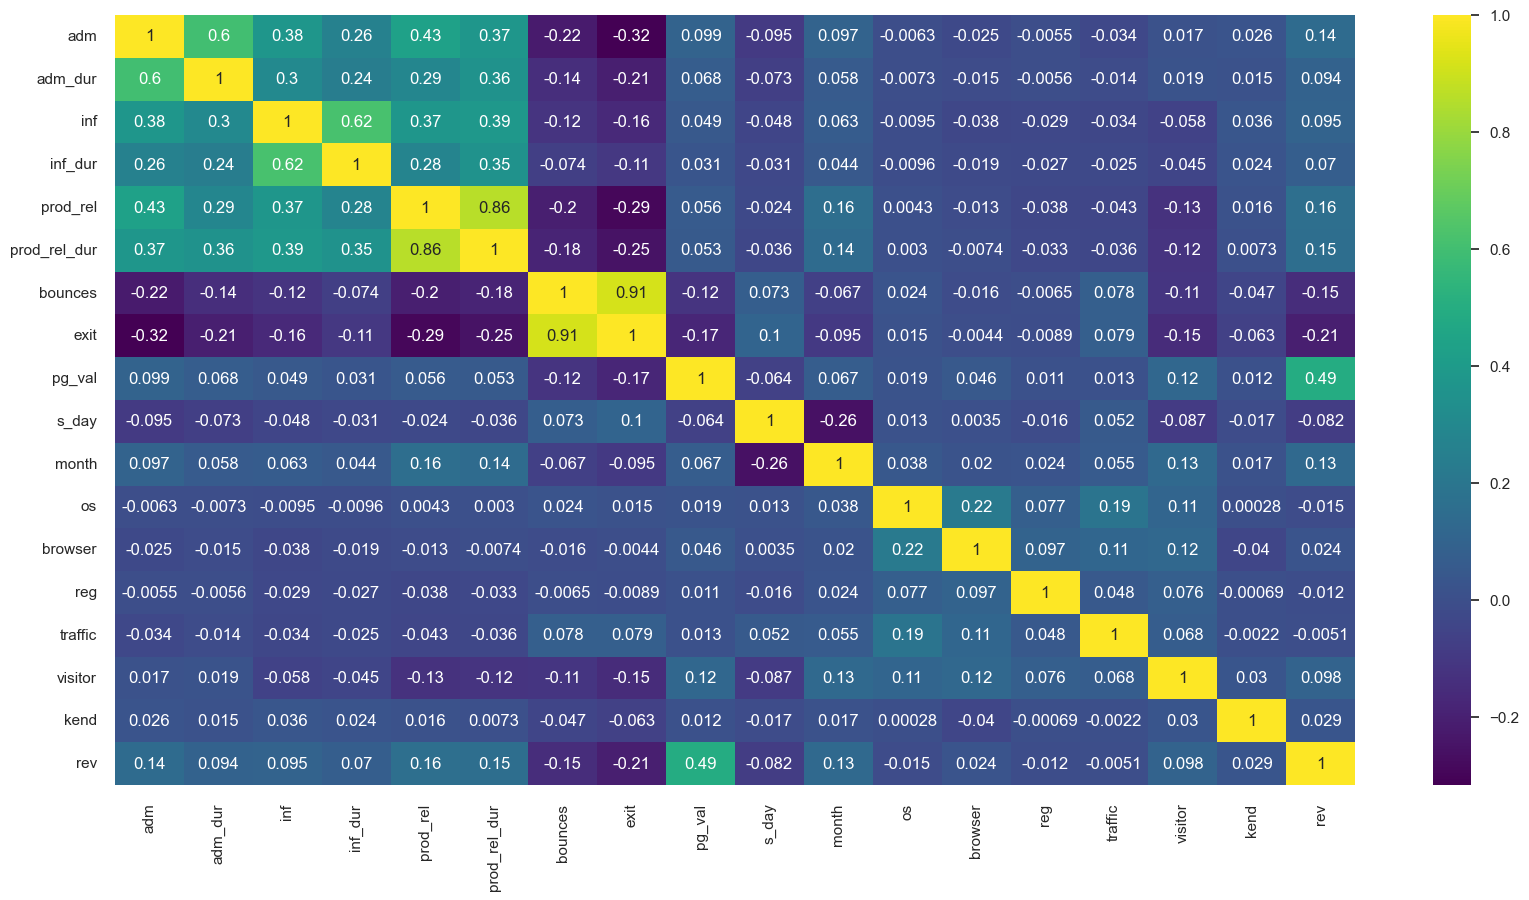

In [368]:
plt.figure(figsize=(20,10))
c = first_df.corr()
sns.heatmap(c,cmap="viridis",annot=True);

## 3.3 Pre-processing data

### 3.3.1 Selecting Significante attributes

In [36]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is
# likely to be a category otherwise continuous

In [37]:
first_df.nunique()

adm               27
adm_dur         3335
inf               17
inf_dur         1258
prod_rel         311
prod_rel_dur    9551
bounces         1872
exit            4777
pg_val          2704
s_day              6
month             10
os                 8
browser           13
reg                9
traffic           20
visitor            3
kend               2
rev                2
dtype: int64

In [38]:
# Categorical data ['adm','inf','s_day','month','os','browser','reg','traffic','visitor','kend']

In [39]:
# Numerical data ['adm_dur','inf_dur','prod_rel','prod_rel_dur','bounces','exit','pg_val']

In [40]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [41]:
# Calling the function to check which categorical variables are correlated with target
continuousVariables = ['adm','inf','s_day','month','os','browser','reg','traffic','visitor','kend']
FunctionAnova(first_df, 'rev', continuousVariables )

##### ANOVA Results ##### 

adm is correlated with rev | P-Value: 3.519759837717179e-54
inf is correlated with rev | P-Value: 3.1740343112109894e-26
s_day is correlated with rev | P-Value: 5.498934260139406e-20
month is correlated with rev | P-Value: 9.17951243284699e-46
os is NOT correlated with rev | P-Value: 0.10339431070882842
browser is correlated with rev | P-Value: 0.007736888294824106
reg is NOT correlated with rev | P-Value: 0.19794262499095086
traffic is NOT correlated with rev | P-Value: 0.5702433635869331
visitor is correlated with rev | P-Value: 5.861359983891014e-28
kend is correlated with rev | P-Value: 0.0011405626259445205


['adm', 'inf', 's_day', 'month', 'browser', 'visitor', 'kend']

In [42]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [43]:
categoricalVariables = ['adm_dur','inf_dur','prod_rel','prod_rel_dur','bounces','exit','pg_val']

# Calling the function
FunctionChisq(first_df, 'rev', categoricalVariables)

adm_dur is correlated with rev | P-Value: 3.0916911627226634e-68
inf_dur is correlated with rev | P-Value: 5.5336715155252504e-34
prod_rel is correlated with rev | P-Value: 1.2201453528044542e-69
prod_rel_dur is correlated with rev | P-Value: 5.129549976526522e-32
bounces is correlated with rev | P-Value: 2.835234062143618e-21
exit is correlated with rev | P-Value: 3.183048182750372e-38
pg_val is correlated with rev | P-Value: 0.0


['adm_dur', 'inf_dur', 'prod_rel', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']

In [44]:
first_df.columns

Index(['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'os', 'browser', 'reg',
       'traffic', 'visitor', 'kend', 'rev'],
      dtype='object')

In [45]:
selectColumns = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend', 'rev']
# Selecting final columns
DataForML= first_df[selectColumns]
DataForML.head()

adm  adm_dur  inf  inf_dur  prod_rel  prod_rel_dur  bounces  exit  pg_val  \
0    0      0.0    0      0.0         1      0.000000     0.20  0.20     0.0   
1    0      0.0    0      0.0         2     64.000000     0.00  0.10     0.0   
2    0      0.0    0      0.0         1      0.000000     0.20  0.20     0.0   
3    0      0.0    0      0.0         2      2.666667     0.05  0.14     0.0   
4    0      0.0    0      0.0        10    627.500000     0.02  0.05     0.0   

   s_day  month  browser  visitor  kend  rev  
0    0.0      2        1        0     0    0  
1    0.0      2        2        0     0    0  
2    0.0      2        1        0     0    0  
3    0.0      2        2        0     0    0  
4    0.0      2        3        0     1    0

In [46]:
DataForML.shape

(12330, 15)

# 4. Data Preparation

## 4.1 Split dataset into X and y

In [47]:
# splitting into X and y
X = DataForML.drop("rev", axis = 1)
y = DataForML['rev']

In [48]:
X = X.values
y = y.values

## 4.2 Nomalization | Scaling

In [49]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [50]:
X_scaled = scaler.fit_transform(X)

The ML results are higher without normalization.

## 4.3 Balance Dataset

### 4.3.1 SMOTE technique

In [51]:
DataForML['rev'].value_counts()

rev
0    10422
1     1908
Name: count, dtype: int64

In [52]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_scaled, y)

In [53]:
np.bincount(y_smote)

array([10422, 10422], dtype=int64)

## 4.4 Establish Train and Test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state = 38)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16675, 14), (4169, 14), (16675,), (4169,))

# 5. Model Building and Evaluation

## 5.1 Building Decision Tree Model

### 5.1.1 Apply Decision Tree Model

In [56]:
# Fitting the model with default hyperparameters
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# Make predictions
predictions_dtree = dtree.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2014
           1       0.90      0.90      0.90      2155

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



### 5.1.2 Find Optimal Hyperparameters using GridSearchCV

In [58]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 8, 15),
    'criterion': ["entropy", "gini"],
    'min_samples_leaf': [10, 30, 50]
}

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
dtree = DecisionTreeClassifier()
dtree_gridsearchcv = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = stratified_kfold, verbose = 1)

# Fit the GridSearchCV to the data
dtree_gridsearchcv.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=38, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 8, 15),
                         'min_samples_leaf': [10, 30, 50]},
             verbose=1)

In [59]:
# GridSearchCV results
dtree_results = pd.DataFrame(dtree_gridsearchcv.cv_results_)
dtree_results_display = dtree_results[['rank_test_score','mean_test_score','param_criterion','param_max_depth',
                         'param_min_samples_leaf']].sort_values('rank_test_score')
dtree_results_display

rank_test_score  mean_test_score param_criterion param_max_depth  \
4                1         0.869685            gini               5   
2                2         0.869566         entropy               5   
3                3         0.869505            gini               5   
1                4         0.869446         entropy               5   
5                5         0.869385            gini               5   
0                6         0.869146         entropy               5   

  param_min_samples_leaf  
4                     30  
2                     50  
3                     10  
1                     30  
5                     50  
0                     10

In [60]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {dtree_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)


In [61]:
dtree_results_scores = dtree_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
dtree_results_scores

rank_test_score  mean_test_score  split0_test_score  split1_test_score  \
4                1         0.869685           0.872302           0.865707   

   split2_test_score  split3_test_score  split4_test_score  split5_test_score  \
4           0.857914           0.867506           0.885492           0.866227   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  
4           0.876425           0.856629           0.884823           0.863827

In [62]:
# Average, minimum and maximum scores
min_max = dtree_results_scores.iloc[:,2:].melt()
rfc_min_score = min_max.value.min()
rfc_max_score = min_max.value.max()
rfc_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.856628674265147 and the maximum accuracy score is: 0.8854916067146283 across 10 folds.
The average accuracy score is: 0.8696851277226567.


### 5.1.3 Apply Decision Tree Model with best Hyperparameters obtained from GridSearchCV.

In [63]:
# Fit the model with optimal hyperparameters
dtree_best = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=5,
                                  min_samples_leaf=30)

dtree_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Decision Tree Model and GridSearchCV: {dtree_best.score(X_test,y_test)} across {n_folds} folds.")

The best accuracy using Decision Tree Model and GridSearchCV: 0.874550251858959 across 10 folds.


### 5.1.4 Evaluation Decision Tree Model

In [64]:
# Print classification report
predictions_dtree = dtree_best.predict(X_test)
print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2014
           1       0.91      0.84      0.87      2155

    accuracy                           0.87      4169
   macro avg       0.88      0.88      0.87      4169
weighted avg       0.88      0.87      0.87      4169



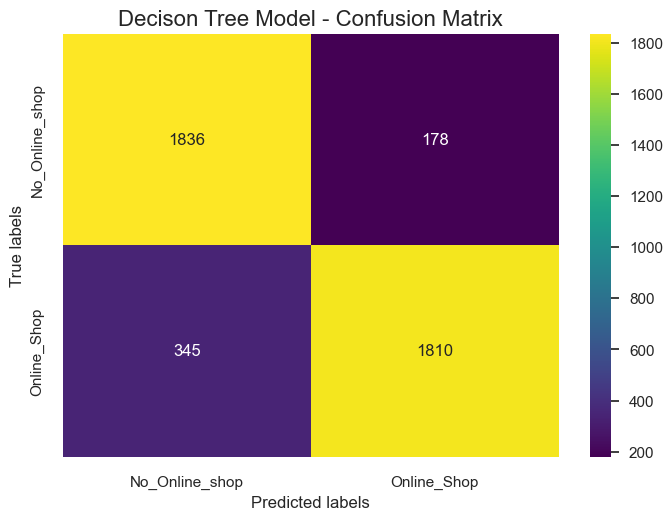

In [377]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_dtree)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('Decison Tree Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

### 5.1.5 Plotting Decision Tree

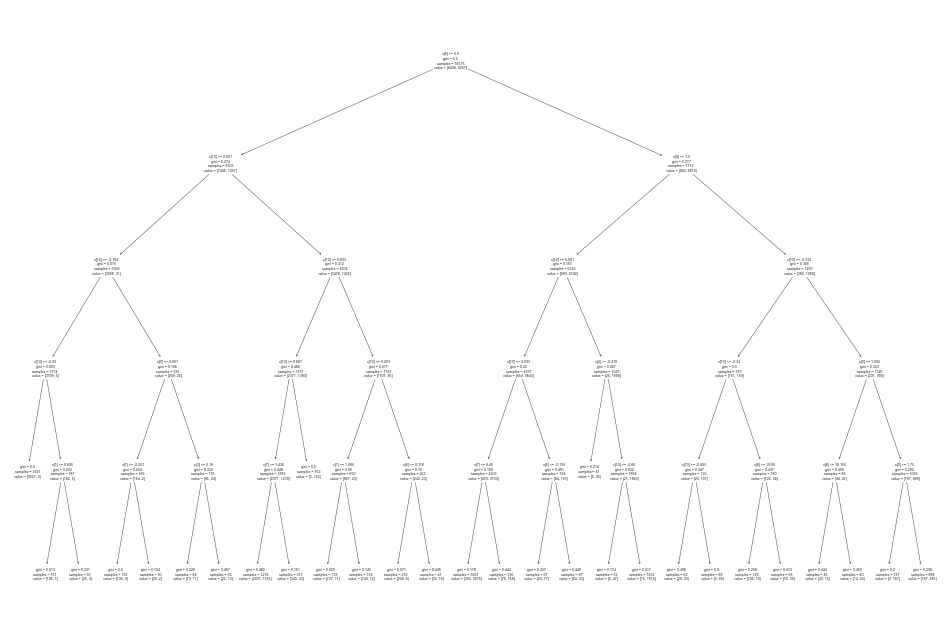

In [66]:
# Display the tree by calling a method plot_tree()
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree_best);

### 5.1.6 Reduce the max_depth to improve the tree visualization

In [67]:
# Reduce max_depth to improve visualization
dtree_best_maxd = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=3,
                                  min_samples_leaf=50
                                  )
dtree_best_maxd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=38)

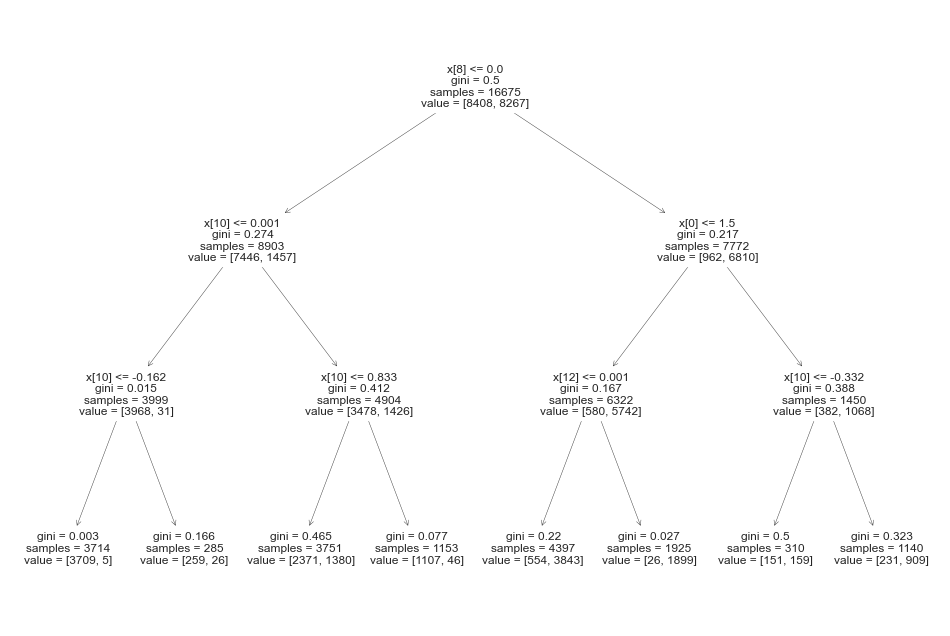

In [68]:
# Display the tree by calling a method plot_tree()
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree_best_maxd);

## 5.2 Building SVM Model

### 5.2.1 Apply SVM Model

In [69]:
# Fit the model with default hyperparameters
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [70]:
# Making predictions
predictions_svm = svm.predict(X_test)

In [71]:
# Print classification report
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      2014
           1       0.88      0.72      0.79      2155

    accuracy                           0.80      4169
   macro avg       0.81      0.81      0.80      4169
weighted avg       0.82      0.80      0.80      4169



### 5.2.2 Find Optimal Hyperparameters using GridSearchCV

In [72]:
# Create the parameter grid based on the results of random search
param_grid = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
svm = SVC(kernel = "rbf")   # tested 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
svm_gridsearchcv = GridSearchCV(estimator = svm, param_grid = param_grid,
                          cv = n_folds, n_jobs = -1, verbose = 1) 

In [73]:
# Fit the GridSearchCV to the data
svm_gridsearchcv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             verbose=1)

In [74]:
# GridSearchCV results
svm_results = pd.DataFrame(svm_gridsearchcv.cv_results_)

svm_results_display = svm_results[['rank_test_score','mean_test_score',
                                   'param_C','param_gamma']].sort_values('rank_test_score')
svm_results_display

rank_test_score  mean_test_score param_C param_gamma
9                 1         0.889594    1000        0.01
6                 2         0.877960     100        0.01
3                 3         0.866505      10        0.01
10                4         0.863566    1000       0.001
7                 5         0.855231     100       0.001
0                 6         0.848633       1        0.01
4                 7         0.845755      10       0.001
11                8         0.839458    1000      0.0001
8                 9         0.834720     100      0.0001
1                10         0.833760       1       0.001
5                11         0.827283      10      0.0001
2                12         0.816549       1      0.0001

In [75]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {svm_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of SVC(C=1000, gamma=0.01)


In [76]:
svm_results_scores = svm_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
svm_results_scores

rank_test_score  mean_test_score  split0_test_score  split1_test_score  \
9                1         0.889594           0.896283           0.891487   

   split2_test_score  split3_test_score  split4_test_score  split5_test_score  \
9           0.898681           0.896882           0.881295           0.889022   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  
9           0.883623           0.891422           0.875825           0.891422

In [77]:
# Average, minimum and maximum scores
min_max = svm_results_scores.iloc[:,2:].melt()
svm_min_score = min_max.value.min()
svm_max_score = min_max.value.max()
svm_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {svm_min_score} and the maximum accuracy score is: {svm_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {svm_mean_score}.")

The minimum accuracy score is: 0.8758248350329934 and the maximum accuracy score is: 0.8986810551558753 across 10 folds.
The average accuracy score is: 0.8895942034614659.


### 5.2.3 Apply SVM Model with best Hyperparameters obtained from GridSearchCV.

In [78]:
# Fit the model with optimal hyperparameters
svm_best = SVC(C=1000, gamma=0.01, kernel="rbf")

svm_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV: {svm_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV: 0.9002158791076997.


### 5.2.4 Evaluation SVM Model

In [79]:
# Make predictions
predictions_svm = svm_best.predict(X_test)

# Print classification report
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2014
           1       0.92      0.88      0.90      2155

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



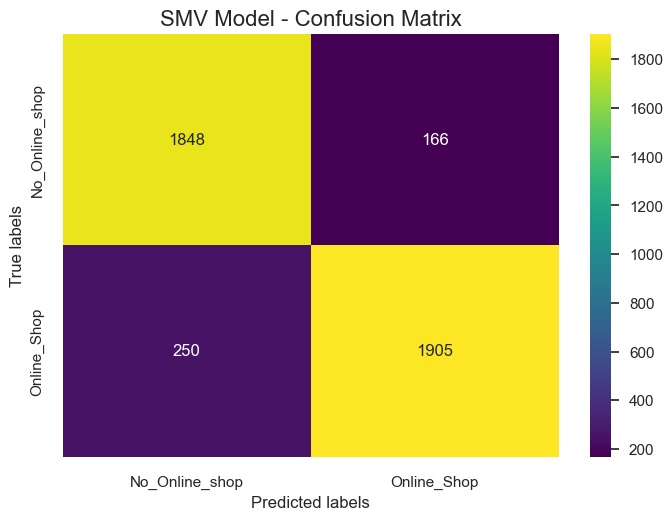

In [378]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_svm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('SMV Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

## 5.3 Building Random Forest Model

### 5.3.1 Apply Random Forest Model

In [81]:
# Fit the model with default hyperparameters
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
# Making predictions
predictions_rfc = rfc.predict(X_test)

In [83]:
# Print classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2014
           1       0.93      0.95      0.94      2155

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169



### The best results found are the Random Forest with default hyperparameters!

### 5.3.2 Find Optimal Hyperparameters using GridSearchCV

In [84]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(1, 5, 10),
    'min_samples_split': range(2, 5, 10),
    'n_estimators': [50, 100, 200],
    'max_features': [5, 10]
}

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
rfc_gridsearchcv = GridSearchCV(estimator = rfc, param_grid = param_grid,
                          cv = n_folds, n_jobs = -1, verbose = 1) 

In [85]:
# Fit the GridSearchCV to the data
rfc_gridsearchcv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(1, 5, 10),
                         'min_samples_split': range(2, 5, 10),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [86]:
# GridSearchCV results
rfc_results = pd.DataFrame(rfc_gridsearchcv.cv_results_)
rfc_results_display = rfc_results[['rank_test_score','mean_test_score','param_max_depth',
                           'param_min_samples_leaf','param_min_samples_split','param_n_estimators',
                           'param_max_features']].sort_values('rank_test_score')
rfc_results_display

rank_test_score  mean_test_score param_max_depth param_min_samples_leaf  \
15                1         0.909924              10                      1   
17                2         0.909504              10                      1   
13                3         0.909384              10                      1   
12                4         0.908605              10                      1   
16                5         0.908545              10                      1   
14                6         0.908005              10                      1   
10                7         0.898109               8                      1   
11                8         0.897870               8                      1   
9                 9         0.896011               8                      1   
7                10         0.895291               8                      1   
8                11         0.894271               8                      1   
6                12         0.892712               8                      1   
5                13         0.868903               4                      1   
4                14         0.868423               4                      1   
3                15         0.868304               4                      1   
0                16         0.864345               4                      1   
2                17         0.863806               4                      1   
1                18         0.863566               4                      1   

   param_min_samples_split param_n_estimators param_max_features  
15                       2                 50                 10  
17                       2                200                 10  
13                       2                100                  5  
12                       2                 50                  5  
16                       2                100                 10  
14                       2                200                  5  
10                       2                100                 10  
11                       2                200                 10  
9                        2                 50                 10  
7                        2                100                  5  
8                        2                200                  5  
6                        2                 50                  5  
5                        2                200                 10  
4                        2                100                 10  
3                        2                 50                 10  
0                        2                 50                  5  
2                        2                200                  5  
1                        2                100                  5

In [87]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {rfc_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of RandomForestClassifier(max_depth=10, max_features=10, n_estimators=50)


In [88]:
rfc_results_scores = rfc_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
rfc_results_scores

rank_test_score  mean_test_score  split0_test_score  split1_test_score  \
15                1         0.909924           0.919065           0.913669   

    split2_test_score  split3_test_score  split4_test_score  \
15           0.910671           0.917866           0.903477   

    split5_test_score  split6_test_score  split7_test_score  \
15           0.914817            0.90102           0.914217   

    split8_test_score  split9_test_score  
15            0.90162           0.902819

In [89]:
# Average, minimum and maximum scores
min_max = rfc_results_scores.iloc[:,2:].melt()
rfc_min_score = min_max.value.min()
rfc_max_score = min_max.value.max()
rfc_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.9010197960407919 and the maximum accuracy score is: 0.9190647482014388 across 10 folds.
The average accuracy score is: 0.9099241302818571.


### 5.3.3 Apply Random Forest Model with best Hyperparameters obtained from GridSearchCV.

In [90]:
# Fit the model with optimal hyperparameters
rfc_best = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_features= 10,
                             n_estimators=200)
rfc_best.fit(X_train,y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV: {rfc_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV: 0.9143679539457904.


### 5.3.4 Evaluation Random Forest Model

In [91]:
# Make predictions
predictions_rfc = rfc_best.predict(X_test)

In [92]:
# Print classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2014
           1       0.92      0.92      0.92      2155

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



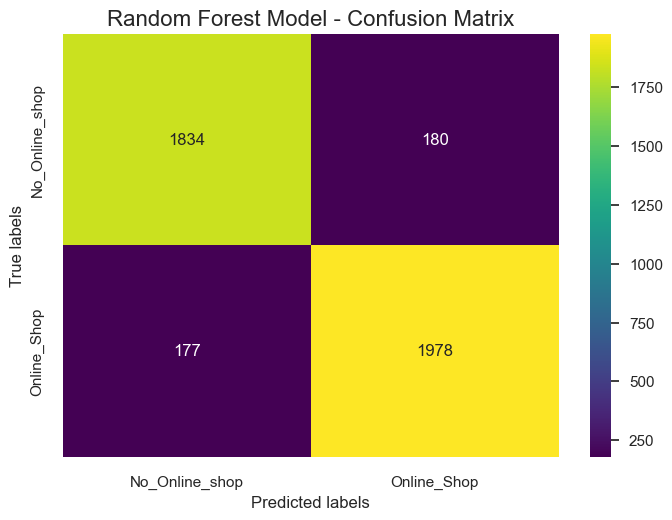

In [379]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_rfc)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('Random Forest Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

# 6. Feature Importances

In [94]:
columns_names = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend']

In [95]:
# Feature importances
feature_importance = rfc_best.feature_importances_
feature_importance_dict = dict(zip(columns_names, feature_importance))

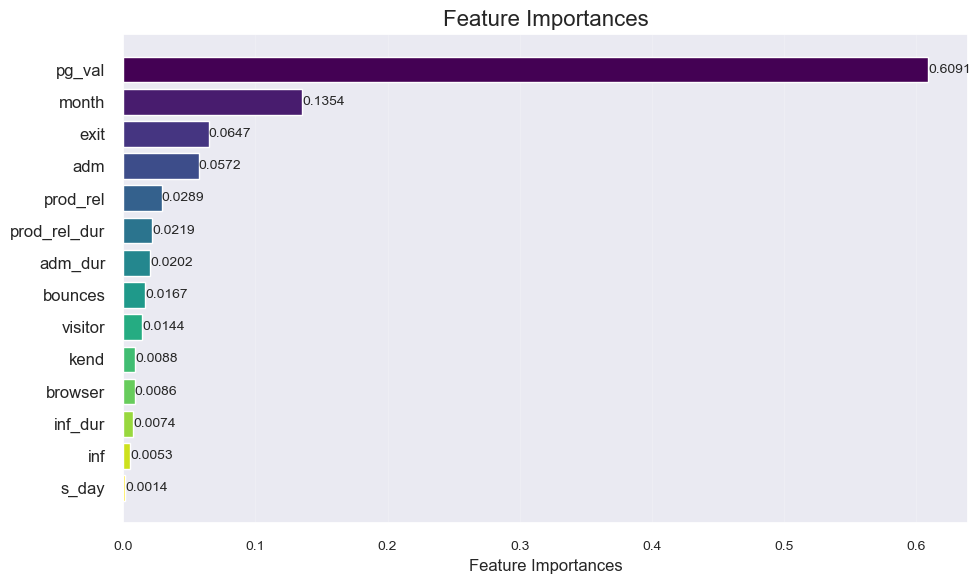

In [382]:
# Plot Feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_feature_importance)

viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color=viridis_colors)
plt.xlabel('Feature Importances', fontsize=12)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)

for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='x', alpha=0.2)
plt.grid(axis='y', linestyle='') 
plt.show()

# 7. SHapley Additive exPlanations (Shap)

Shap is a method used to explain the output of machine model model. It helps to explain how the model arrives at its decision for individual predictions. 

Feature importance tell us how important each feature is to the model prediction in general. However, Shap tell us for individual features, and if the feature tend to increase or decrease the prediction. 

In [97]:
# Create object that can calculate SHAP values of the GridSearchCV model
explainer = shap.TreeExplainer(rfc_best)

# Calculate SHAP values based on X_train data
shap_values = explainer.shap_values(X_train)

#shap_values = explainer.shap_values(X_train[0:100])

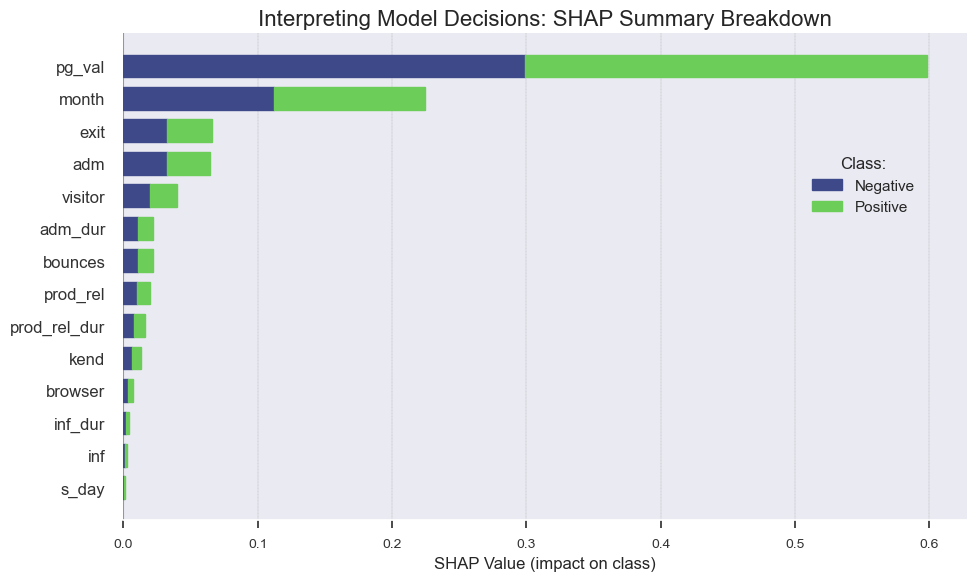

In [392]:
# Create the summary plot with default colors for both classes
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=columns_names, class_names=["Negative", "Positive"], show=False)

plt.gcf().set_size_inches(10, 6)
custom_colors = ['#3E4989', '#6DCD59']  

# Retrieve the bar plot and modify the colors for each class
bars = plt.gcf().get_axes()[0].patches

# Iterate through the bars and set the custom colors for each class
for i, bar in enumerate(bars):
    if i < len(bars) // 2: 
        bar.set_color(custom_colors[0])
    else:  
        bar.set_color(custom_colors[1])

plt.xlabel("SHAP Value (impact on class)", fontsize=12)
plt.title("Interpreting Model Decisions: SHAP Summary Breakdown", fontsize=16)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.legend(loc='lower left', bbox_to_anchor=(0.8, 0.6), title='Class:', title_fontsize='12')
plt.grid(axis='x', linestyle='--', linewidth=0.2, color='gray')
plt.grid(axis='y', linestyle='')
plt.show()

# 8. Conclusions (Tests and Experimentations)

* During the process of testig diferent scenarios for the Machine Learning Models, When we deleted or replace outliers, our models performance went low.
* To balance our dataset we have tried both NearMiss and SMOTE techniques. However, the performance using SMOTE Techniques are better. On the other hand, we decided that reduce the observations is not an appropriated appoache because it could bring issues like the curse of dimensionality.
* To Normalize our dataset, we have tried Scale, StandardScaled and MinMaxScaler. The  Robust Scaler is the optimal solution.
* Tests were performed, including the Principal Componentes Analysis (PCA) . It reduced our attributes to 3. However, the Machine Learning worked poorly since it reduced our accuracy.

In [99]:
Well Done Natalia!!!

SyntaxError: invalid syntax (2529457252.py, line 1)

In [ ]:
['#440154', '#482878', '#3E4989', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']


High Contrast:

'#440154' (Dark Purplish)
'#FDE725' (Bright Yellow)
Moderate Contrast:

'#3E4989' (Dark Blue)
'#6DCD59' (Green)
Subtle Contrast:

'#26828E' (Teal)
'#B4DD2C' (Lime Green)

# 7. Appendix

## Appendix: ML tests

## Appendix: Balancing tests

#### NearMiss Technique

In [ ]:
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train)

## Appendix: Normalization Tests

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Scale

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X_scaled = scale(X)

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Appendix: PCA test

In [ ]:
df_no_label = DataForML.drop(columns=["rev"])
df_no_label.shape

In [ ]:
pca = PCA().fit(df_no_label)

In [ ]:
pca = PCA().fit(X)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio',fontsize = 12)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlim(0,10)
sns.set(color_codes=True);

In [ ]:
pca = PCA(3)
df_projected = pca.fit_transform(X)

In [ ]:
col_names = ['col_' + str(i) for i in range(1, 4)]
print(col_names)

In [ ]:
pca_df = pd.DataFrame(df_projected, columns =['col_1', 'col_2', 'col_3'])

In [ ]:
pca_df["rev"] = DataForML["rev"]

In [ ]:
pca_df.head()

In [ ]:
print('STATUS: Original Shape (before PCA): ', X.shape)
print('STATUS: Transformed Shape (after PCA): ',pca_df.shape)